In [1]:
import numpy as np
import modin.pandas as pd

In [2]:
load_columns = [
    "Index",
    "ph",
    "iron",
    "nitrate",
    "chloride",
    "lead",
    "zinc",
    "color",
    "turbidity",
    "fluoride",
    "copper",
    "odor",
    "sulfate",
    "conductivity",
    "chlorine",
    "manganese",
    "total_dissolved_solids",
    "source",
    "water_temperature",
    "air_temperature",
    "month",
    "day",
    "time_of_day",
    "target",
]

df = pd.read_csv("../../dataset/freshwater/dataset.csv", index_col="Index", names=load_columns, skiprows=1)
df.info()

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

E0211 19:07:23.299866584     963 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0211 19:07:23.408162083     963 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0211 19:07:24.133581873     963 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0211 19:07:24.146823273     963 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
2023-02-11 19:07:24,264	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
(raylet) /home/fahmi/bin/mambaforge/envs/oneapi/lib/python3.10/site-packages/ray/dashboard/agent.py:51: DeprecationWarning: There is no current event loop

<class 'modin.pandas.dataframe.DataFrame'>
Int64Index: 5956842 entries, 0 to 5956841
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ----------------------  ----------------  -----  
 0   ph                      5840788 non-null  float64
 1   iron                    5917089 non-null  float64
 2   nitrate                 5851117 non-null  float64
 3   chloride                5781311 non-null  float64
 4   lead                    5929933 non-null  float64
 5   zinc                    5800716 non-null  float64
 6   color                   5951103 non-null  object
 7   turbidity               5907027 non-null  float64
 8   fluoride                5767686 non-null  float64
 9   copper                  5757440 non-null  float64
 10  odor                    5777951 non-null  float64
 11  sulfate                 5759424 non-null  float64
 12  conductivity            5792981 non-null  float64
 13  chlorine                5899017 non-null  float64
 14

In [3]:
df.iloc[0, :]

ph                          8.332988
iron                        0.000083
nitrate                     8.605777
chloride                  122.799772
lead                             0.0
zinc                        3.434827
color                      Colorless
turbidity                   0.022683
fluoride                    0.607283
copper                      0.144599
odor                        1.626212
sulfate                    87.266538
conductivity              471.683357
chlorine                    3.708178
manganese                        0.0
total_dissolved_solids    332.118789
source                           NaN
water_temperature                NaN
air_temperature            43.493324
month                        January
day                             29.0
time_of_day                      4.0
target                             0
Name: 0, dtype: object

In [10]:
df["date"] = df.apply(lambda x: f"2023-{x.month}-{x.day:02,.0f} {x.time_of_day:02,.0f}:00:00" if not pd.isna(x.month) and not pd.isna(x.day) and not pd.isna(x.time_of_day) else np.nan, axis=1)
df["date"] = pd.to_datetime(df["date"])

In [11]:
df.to_parquet("../../dataset/freshwater/dataset-p2.parquet")

<AxesSubplot: >

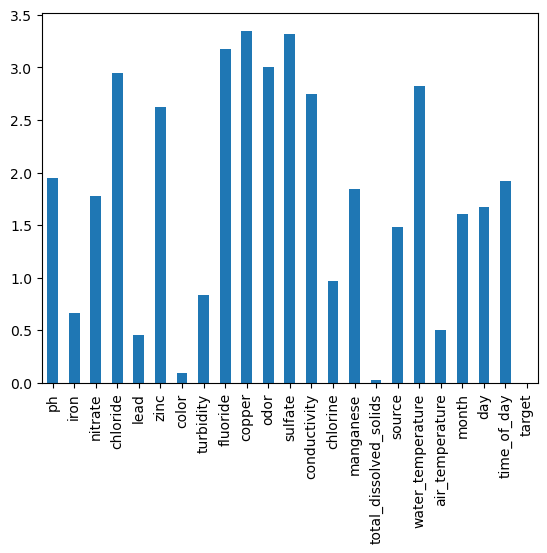

In [7]:
df_missing_values = df.isna().sum() / df.shape[0] * 100
df_missing_values.plot(kind="bar")

<AxesSubplot: xlabel='date'>

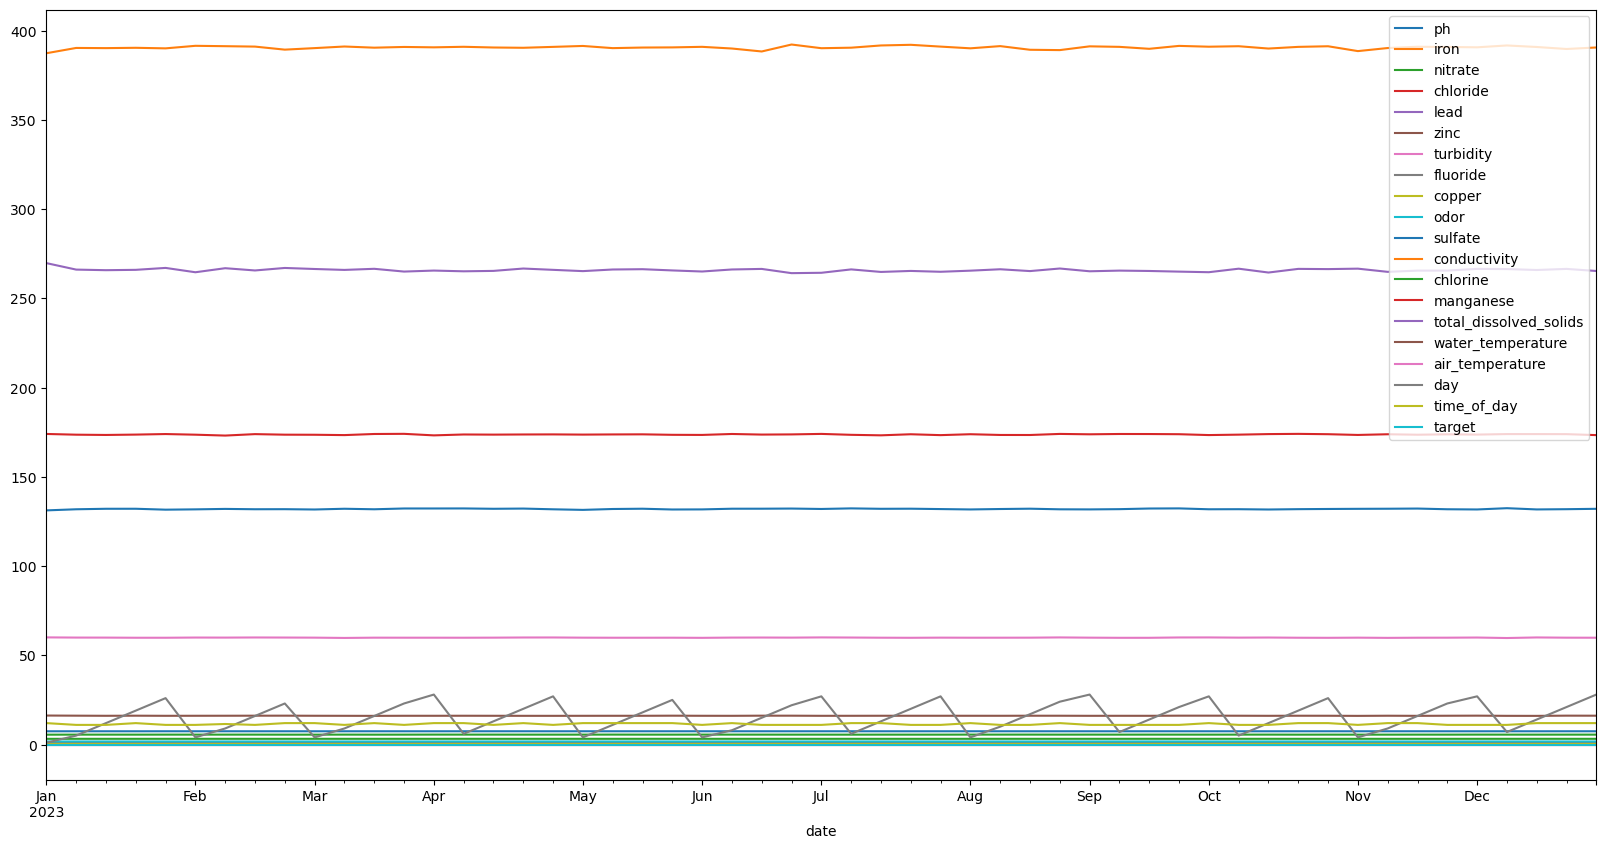

In [19]:
df_ts = df.dropna(subset=["date"])
df_ts = df_ts.set_index("date")
df_ts = df_ts.fillna(0)
df_ts = df_ts.resample("W").mean()
df_ts.to_json("../app_web/assets/data/water-chemicals.json", orient="index")

df_ts.plot(figsize=(20, 10))

In [23]:
df_count_color = df["color"].value_counts().sort_values()
df_count_color.to_json("../app_web/assets/data/water-color.json", orient="split")
df_count_color

color
Yellow             539048
Light Yellow       758138
Faint Yellow      1079772
Near Colorless    1786234
Colorless         1787911
Name: color, dtype: int64

In [24]:
df_count_source = df["source"].value_counts().sort_values()
df_count_source.to_json("../app_web/assets/data/water-source.json", orient="split")
df_count_source

source
Lake         732618
Spring       732700
River        732980
Reservoir    733298
Aquifer      733778
Well         734315
Ground       734389
Stream       734502
Name: source, dtype: int64